In [1]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def vis_hybrid_image(hybrid_image):
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output * 255).astype(np.uint8)
  return output

def gaussian_2D_filter(size, cutoff_frequency):
  gauss_1d = cv2.getGaussianKernel(size,cutoff_frequency)
  gauss_2d = gauss_1d * gauss_1d.T
  return gauss_2d

def imgfilter(image, filter):
  img_filter = cv2.filter2D(image, -1 , filter)
  return img_filter

def log_mag_FFT(image):
  magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  return magnitude_spectrum

C:\Users\ashut\AppData\Local\Temp/ipykernel_32460/1177795655.py:35: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))


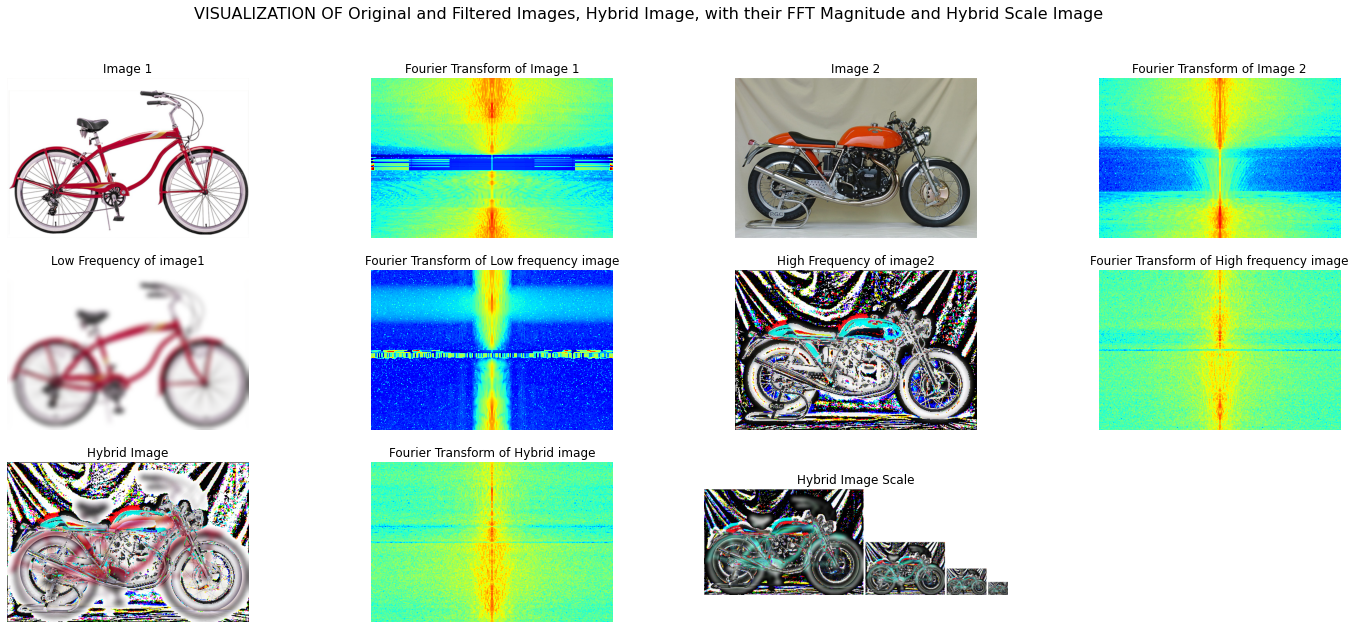

In [3]:
os.path.abspath(os.getcwd())

def hybrid_image(image_1,image_2,cutoff_frequency):
  filter_size = cutoff_frequency*4+1
  """cutoff_frequency is the standard deviation, in pixels, of the 
  Gaussian blur that will remove the high frequencies from one image (image_1) and 
  remove the low frequencies from another image (image_2) (to do so, subtract a blurred
  version from the original version). You will want to tune this for every image pair to get the best results."""

  filter = gaussian_2D_filter(filter_size, cutoff_frequency)

  """Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
  Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

  blurred_image1 = imgfilter(image_1, filter)
  low_frequencies = blurred_image1

  """Remove the low frequencies from image_2. The easiest way to do this is to
  subtract a blurred version of image_2 from the original version of image_2.
  This will give you an image centered at zero with negative values."""

  blurred_image2 = imgfilter(image_2, filter)
  high_frequencies = image_2-blurred_image2

  """Combine the high frequencies and low frequencies to obtain hybrid_image."""
  hybrid_image= low_frequencies + high_frequencies

  """Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""

  """Secondly, also visualize log magnitude of Fourier Transform of the above.
  HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""
  FFT_image_low = log_mag_FFT(low_frequencies)
  FFT_image_high = log_mag_FFT(high_frequencies)
  FFT_image_hybrid = log_mag_FFT(hybrid_image)
  FFT_image_image1 = log_mag_FFT(image_1)
  FFT_image_image2 = log_mag_FFT(image_2)


  """Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
  Lastly, save all your outputs."""
  hybrid_image_scale = vis_hybrid_image(hybrid_image)

  fig, axarr = plt.subplots(3, 4,figsize=(25, 10))
  fig.suptitle('VISUALIZATION OF Original and Filtered Images, Hybrid Image, with their FFT Magnitude and Hybrid Scale Image ', fontsize=16)
  plt.gcf().set_facecolor('white')

  axarr[0,0].imshow(cv2.cvtColor(image_1, cv2.COLOR_RGB2BGR))
  axarr[0,0].set_title("Image 1")
  axarr[0,0].axis('off')

  axarr[0,1].imshow(cv2.cvtColor(FFT_image_image1.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  axarr[0,1].set_title("Fourier Transform of Image 1")
  axarr[0,1].axis('off')

  axarr[0,2].imshow(cv2.cvtColor(image_2, cv2.COLOR_RGB2BGR))
  axarr[0,2].set_title("Image 2")
  axarr[0,2].axis('off')

  axarr[0,3].imshow(cv2.cvtColor(FFT_image_image2.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  axarr[0,3].set_title("Fourier Transform of Image 2")
  axarr[0,3].axis('off')

  axarr[1,0].imshow(cv2.cvtColor(low_frequencies, cv2.COLOR_RGB2BGR))
  axarr[1,0].set_title("Low Frequency of image1")
  axarr[1,0].axis('off')

  axarr[1,1].imshow(cv2.cvtColor(FFT_image_low.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  axarr[1,1].set_title("Fourier Transform of Low frequency image")
  axarr[1,1].axis('off')

  axarr[1,2].imshow(cv2.cvtColor(high_frequencies, cv2.COLOR_RGB2BGR))
  axarr[1,2].set_title("High Frequency of image2")
  axarr[1,2].axis('off')

  axarr[1,3].imshow(cv2.cvtColor(FFT_image_high.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  axarr[1,3].set_title("Fourier Transform of High frequency image")
  axarr[1,3].axis('off')

  axarr[2,0].imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_RGB2BGR))
  axarr[2,0].set_title("Hybrid Image")
  axarr[2,0].axis('off')

  axarr[2,1].imshow(cv2.cvtColor(FFT_image_hybrid.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  axarr[2,1].set_title("Fourier Transform of Hybrid image")
  axarr[2,1].axis('off')

  axarr[2,2].imshow(cv2.cvtColor(hybrid_image_scale, cv2.COLOR_RGB2BGR))
  axarr[2,2].set_title("Hybrid Image Scale")
  axarr[2,2].axis('off')

  axarr[2,3].set_visible(False)

image_1a = cv2.imread('./hybrid_pyramid_input/data/bicycle.bmp')
image_2a = cv2.imread('./hybrid_pyramid_input/data/motorcycle.bmp')
hybrid_image(image_1a,image_2a,5)

C:\Users\ashut\AppData\Local\Temp/ipykernel_32460/1177795655.py:35: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))


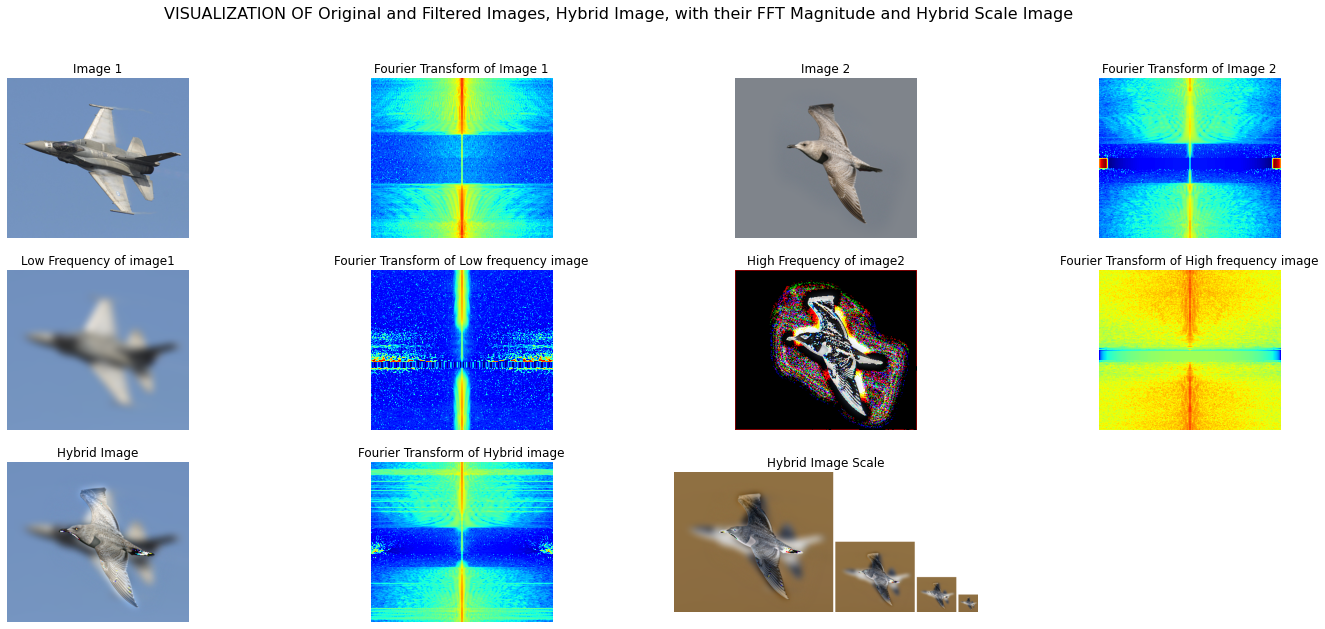

In [4]:
image_1b = cv2.imread('./hybrid_pyramid_input/data/plane.bmp')
image_2b = cv2.imread('./hybrid_pyramid_input/data/bird.bmp')
hybrid_image(image_1b,image_2b,8)

C:\Users\ashut\AppData\Local\Temp/ipykernel_32460/1177795655.py:35: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))


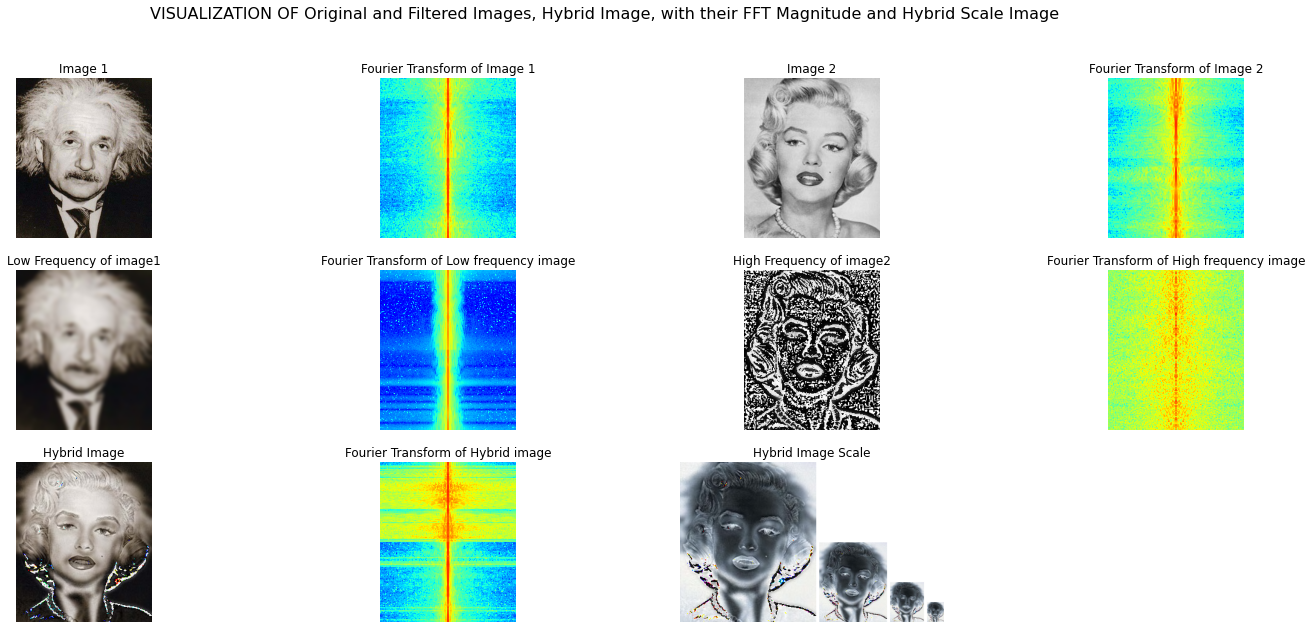

In [5]:
image_1c = cv2.imread('./hybrid_pyramid_input/data/einstein.bmp')
image_2c = cv2.imread('./hybrid_pyramid_input/data/marilyn.bmp')
hybrid_image(image_1c,image_2c,3)

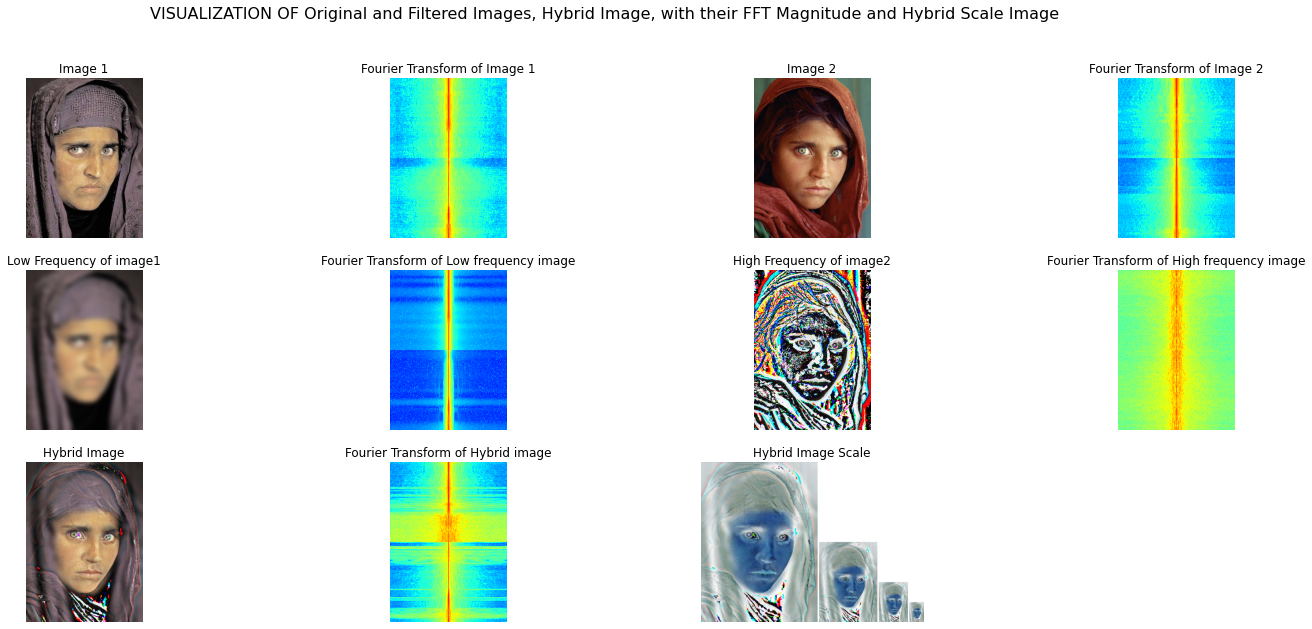

In [6]:
image_1d = cv2.imread('./hybrid_pyramid_input/data/Afghan_girl_after.jpg')
image_2d = cv2.imread('./hybrid_pyramid_input/data/Afghan_girl_before.jpg')
hybrid_image(image_1d,image_2d,8)

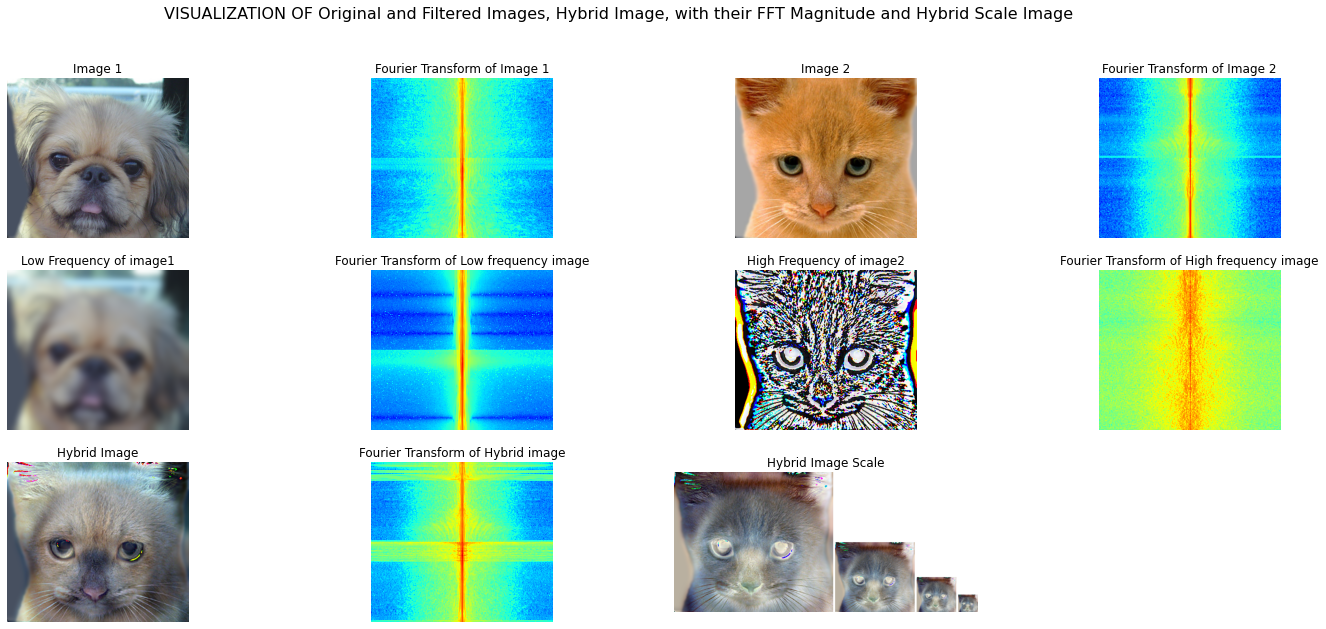

In [7]:
image_1e = cv2.imread('./hybrid_pyramid_input/data/dog.bmp')
image_2e = cv2.imread('./hybrid_pyramid_input/data/cat.bmp')
hybrid_image(image_1e,image_2e,7)

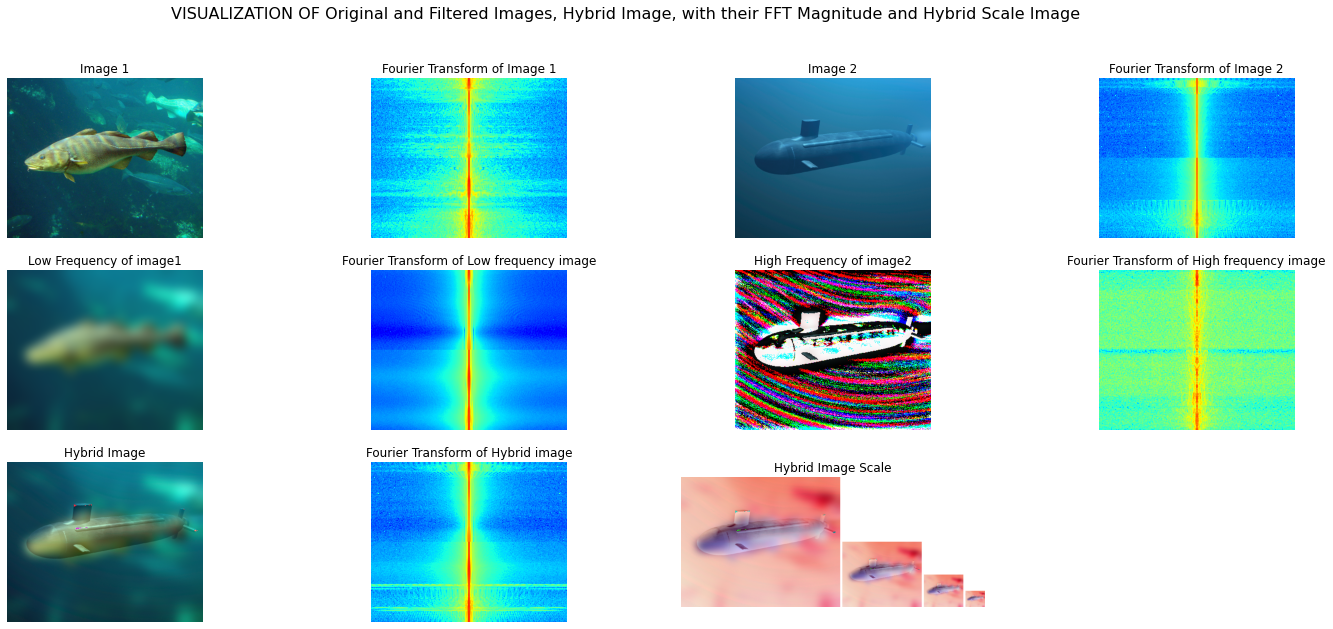

In [8]:
image_1f = cv2.imread("./hybrid_pyramid_input/data/fish.bmp")
image_2f = cv2.imread('./hybrid_pyramid_input/data/submarine.bmp')
hybrid_image(image_1f,image_2f,10)

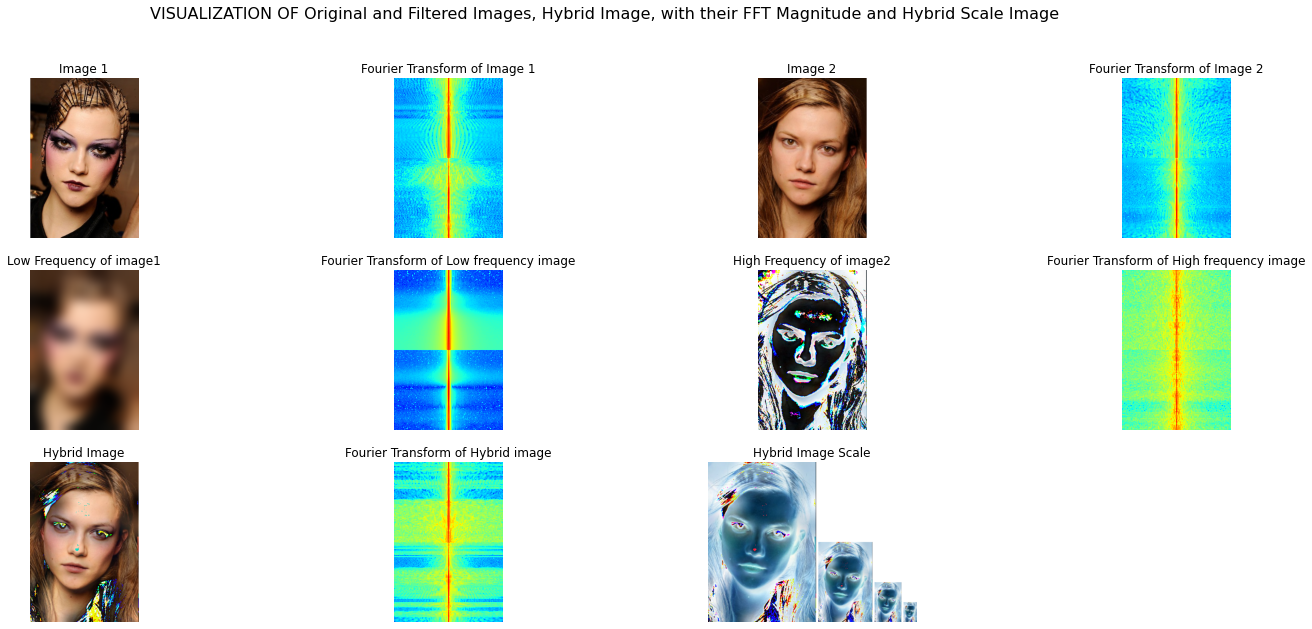

In [9]:
image_2g = cv2.imread("./hybrid_pyramid_input/data/makeup_before.jpg")
image_1g = cv2.imread('./hybrid_pyramid_input/data/makeup_after.jpg')
image_2g = cv2.resize(image_2g, (image_1g.shape[1],image_1g.shape[0]), interpolation = cv2.INTER_AREA)
hybrid_image(image_1g,image_2g,13)